In [ ]:
# Plot the output netcdfs quickly

import os
from glob import glob
from utils import plot_netcdf

# in_dir = '/Users/tbupper90/Dropbox/Reaserch/BCI_study/netcdf/'
in_dir = '/Users/tbupper90/data/bci_study/testing/netcdf/'

out_dir = '/Users/tbupper90/Data/bci_study/images/'

files = glob(os.path.join(in_dir, '*'))

for f in files:
    print(f)
#     plot_netcdf(f, os.path.join(out_dir, f.replace('.nc', '.png').split('/')[-1]))


In [2]:
def greens_theorem(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

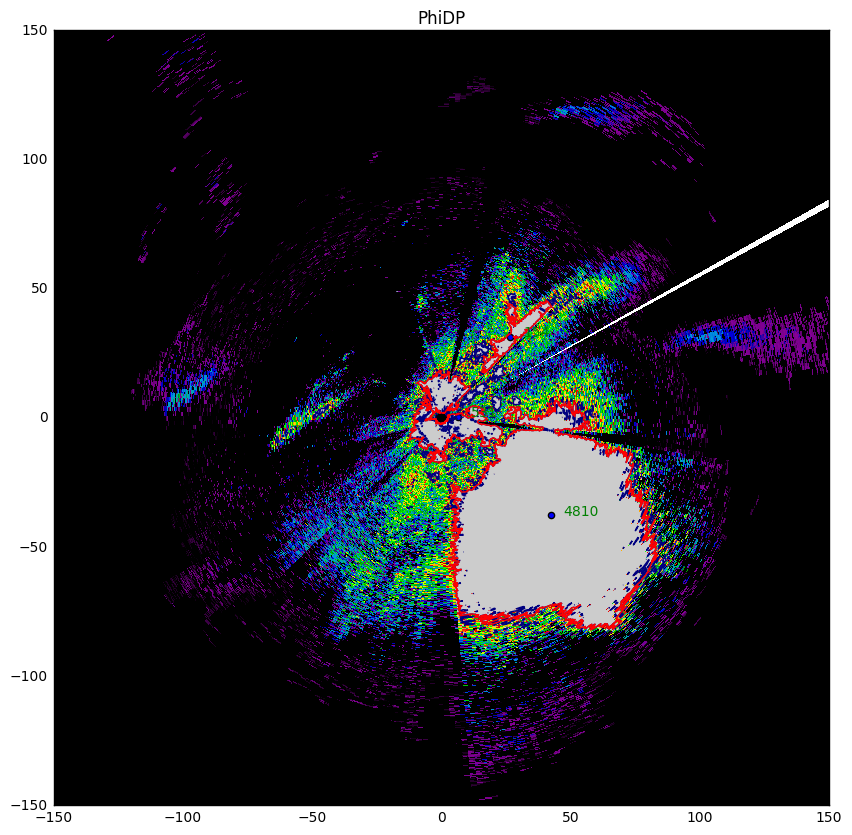

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
from shapely.geometry import Polygon
from glob import glob


# in_dir = '/Users/tbupper90/data/bci_study/testing/netcdf/'
in_dir = '/Users/tbupper90/Google Drive/Research/BCI_study/Data/averages'
out_dir = '/Users/tbupper90/Data/bci_study/images/'

files = glob(os.path.join(in_dir, '*20140607*.nc'))

for f in files:
    nc = netCDF4.Dataset(f)
    
    # Get the grid figure out
    range_m, az_rad = np.meshgrid(nc['range'][:], nc['azimuth'][:])
    elev = np.deg2rad(nc.elevation)

    x_m = range_m * np.cos(elev) * np.sin(az_rad)
    y_m = range_m * np.cos(elev) * np.cos(az_rad)
    
    plt.figure(figsize=(10, 10), dpi=500)
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.pcolormesh(x_m * 1e-3, y_m * 1e-3, nc['phi_dp_weighted_sum'][:]/nc.num_scans, 
                   vmin=0, vmax=360, cmap='nipy_spectral')
    contours = plt.contour(x_m * 1e-3, y_m * 1e-3, nc['phi_dp_weighted_sum'][:]/nc.num_scans, levels=[360.])
    plt.title("PhiDP")
    


    for path in contours.collections[0].get_paths():
        verts_sum = np.asarray([0, 0], dtype='float64')
        verts = path.vertices
        if greens_theorem(verts) > 100: 
#             for vert in verts:
#                 verts_sum += vert
#                 plt.scatter(vert[0], vert[1], color='r')
                
#             centroid = verts_sum / len(verts)
#             plt.scatter(centroid[0], vert[1], color='g')
            try:
                poly = Polygon(verts)
                x, y = poly.exterior.xy
                plt.plot(x, y, color='r')
                rep_x = poly.representative_point().x
                rep_y = poly.representative_point().y
                plt.scatter(rep_x, rep_y)
                plt.text(rep_x+5, rep_y, str(round(poly.area)), color='green')
            except Exception:
                
                pass
    
    
#     plt.savefig(os.path.join('images', f.replace('.nc', '.png').split('/')[-1]))
#     plt.close()
#     nc.close()

In [10]:
plt.close()

In [6]:
blah = np.where(nc['phi_dp_sum'][:]!=0, nc['phi_dp_weighted_sum'][:]/nc['phi_dp_sum'][:], 0)


/Users/tbupper90/anaconda/envs/bci/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


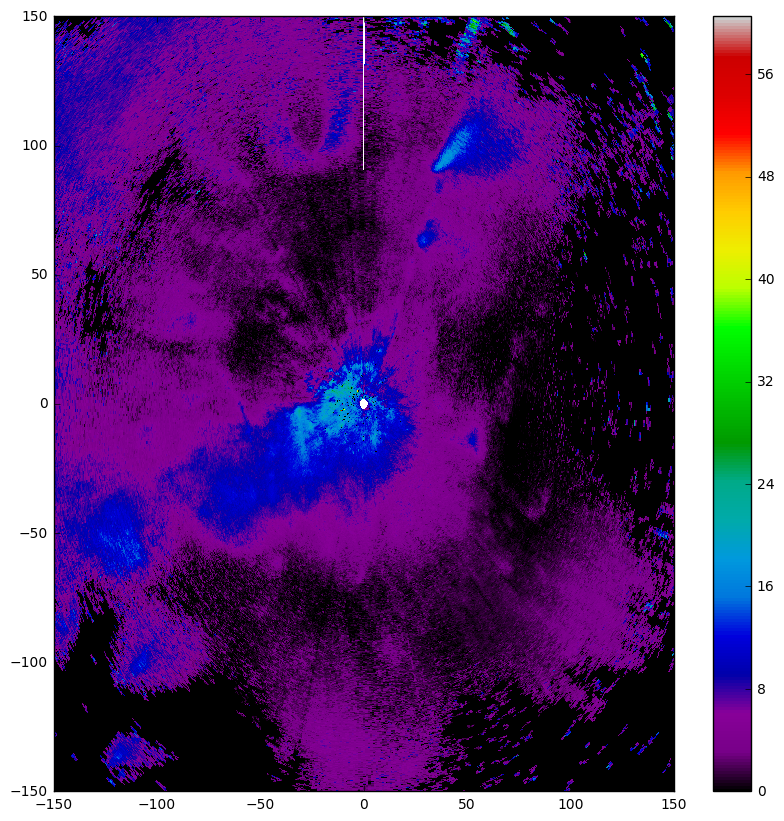

In [7]:
plt.figure(figsize=(10, 10), dpi=500)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.pcolormesh(x_m * 1e-3, y_m * 1e-3, blah, cmap='nipy_spectral', vmin=0)
plt.colorbar()
# contours = plt.contour(x_m * 1e-3, y_m * 1e-3, blah)


# for path in contours.collections[0].get_paths():
#         verts_sum = np.asarray([0, 0], dtype='float64')
#         verts = path.vertices
#         if greens_theorem(verts) > 100: 
# #             for vert in verts:
# #                 verts_sum += vert
# #                 plt.scatter(vert[0], vert[1], color='r')
                
# #             centroid = verts_sum / len(verts)
# #             plt.scatter(centroid[0], vert[1], color='g')
#             try:
#                 poly = Polygon(verts)
#                 x, y = poly.exterior.xy
#                 plt.plot(x, y, color='r')
#                 rep_x = poly.representative_point().x
#                 rep_y = poly.representative_point().y
#                 plt.scatter(rep_x, rep_y)
#                 plt.text(rep_x+5, rep_y, str(round(poly.area)), color='green')
#             except Exception:
                
#                 pass

In [8]:
import csv

with open('/Users/tbupper90/Google Drive/Research/BCI_study/cave_locations.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        print(row)

{'radar': 'KDFX', 'name': 'Frio', 'lat': '29.434507', 'lon': '-99.684534'}
{'radar': 'KDFX', 'name': 'Stuart', 'lat': '29.610016', 'lon': '-100.452465'}
{'radar': 'KEWX', 'name': 'Davis Blowout', 'lat': '30.44694', 'lon': '-98.57722'}
{'radar': 'KDFX', 'name': 'Ney', 'lat': '29.622545', 'lon': '-99.186179'}
{'radar': 'KEWX', 'name': 'Bracken', 'lat': '29.68715', 'lon': '-98.352606'}
{'radar': 'KDFX', 'name': 'Fern', 'lat': '29.9477778', 'lon': '-101.2358333'}
{'radar': 'KDFX', 'name': 'Devils Sinkhole', 'lat': '30.015773', 'lon': '-100.208552'}
{'radar': 'KSJT', 'name': 'JamesRiver', 'lat': '30.568071', 'lon': '-99.330652'}


In [26]:
x_m_new = np.arange(-460000, 460000, 250)
y_m_new = np.arange(-460000, 460000, 250)

print(x_m_new.shape)
x_m_new, y_m_neew = np.meshgrid(x_m_new, y_m_new)

import pyart
radar = pyart.io.read_nexrad_archive('/Users/tbupper90/Data/bci_study/testing/KDFX/raw/20160617/KDFX20160617_020646_V06')


(3680,)


In [105]:
# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('reflectivity')

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.map_gates_to_grid(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, x_m_new.shape[0], y_m_new.shape[0]),
    grid_limits=((0, 1000), (y_m_new.min(), y_m_new.max()), (x_m_new.min(), x_m_new.max())),
    fields=['differential_phase'],
    roi_func='constant',
    const_roi=500)

(-100, 100)

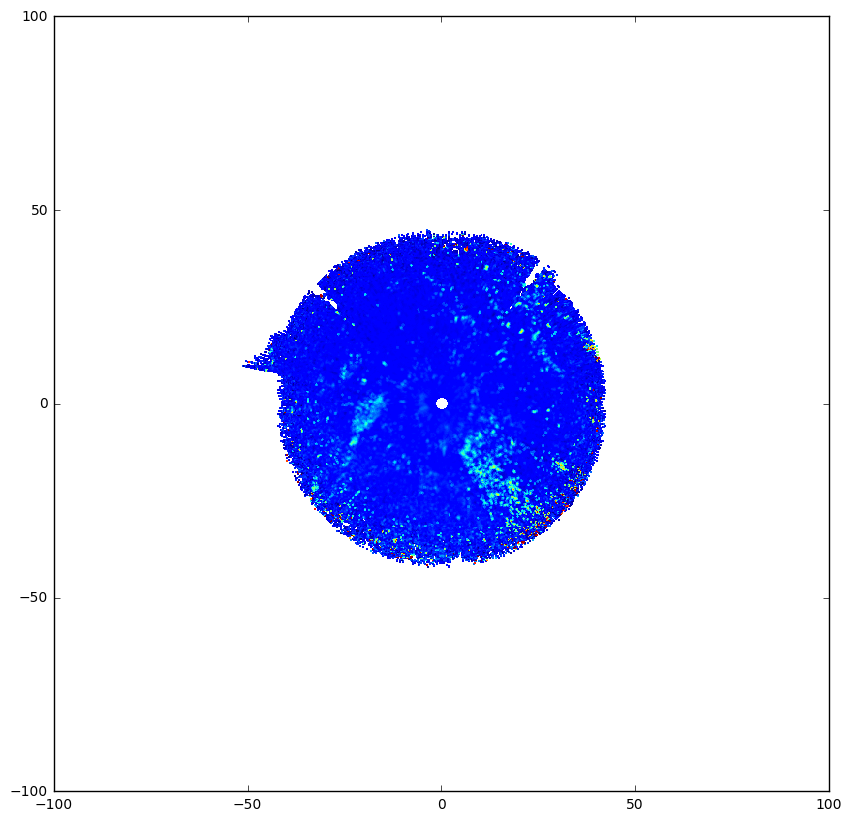

In [48]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(x_m_new/1e3, y_m_new/1e3, grid['differential_phase'][0])
plt.xlim(-100, 100)
plt.ylim(-100, 100)